<a href="https://colab.research.google.com/github/patelarth/pegasus-onnews-ads/blob/main/Result_overall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [2]:
cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
import pandas as pd
import numpy as np
arth_cnn = pd.read_csv('arth.csv')
arth_cnn.head(2)

,Unnamed: 0,text,summary,predicted
0,0,French President Emmanuel Macron has told Aust...,Emmanuel Macron tells Scott Morrison ‘trust wa...,['French President Emmanuel Macron has told Au...
1,1,West Coast AFL forward Jamaine Jones will face...,‘Bitterly disappointed’: Eagles forward to fac...,"[""Jamaine Jones will face court on Friday on a..."


In [4]:
bhagya_wikihow = pd.read_csv('pegasus-wikihow.csv')
bhagya_wikihow.head(2)

,model_trained_on,text_source,predicted_summary,original_summary,recall,precision,fmeasure,human_evaluation
0,pegasus-wikihow,wikihow,Learn how to set up a tent with this wikiHow a...,This article summarizes the steps for finding ...,0.238095,0.303030,0.266667,2
1,pegasus-wikihow,wikihow,Learn how to write a manuscript and find a lit...,A guide to provide guidance for publishing a n...,0.276596,0.433333,0.337662,4


In [5]:
Nakul_reddittifu = pd.read_csv('reddit_tifu.csv')
Nakul_reddittifu.head(2)

,model,data_source,humansummary,predicted_summary,roughscorer,precision,recall,fmeasure,Human_evaluation
0,Reddit_tifu,articles,comprehensive research data management is fund...,['data management is fundamental to ensuring r...,rouge1,0.887097,0.887097,0.887097,4
1,Reddit_tifu,articles,collection and open sharing of wastewater base...,['collection and open sharing of wastewater ba...,rouge1,1.000000,0.668478,0.801303,3


In [6]:
danish_xsum = pd.read_csv('danish_xsum.csv')
danish_xsum.head(2)

,Unnamed: 0,model,source,original summary,predicted,recall,precision,fmeasure,human_evaluation
0,0,xsum,bbc,Cleo Smith: Missing 4-year-old found alive in ...,All images are copyrighted.,0.000000,0.00,0.000000,0
1,1,xsum,bbc,Ethiopia's war one year on: How to end the suf...,"The Ethiopian capital, Addis Ababa, is on edge.",0.181818,0.25,0.210526,2


In [7]:
!pip install rouge-score
from rouge_score import rouge_scorer
def check_the_rouge(summary,predicted):
  r1 = [[],[],[]] # metrix for rouge 1 score index 0 for recall, 1 for precision and 2 for fmeasure 
  r2 = [[],[],[]] # metrix for rouge 2 score index 0 for recall, 1 for precision and 2 for fmeasure
  rL = [[],[],[]] # metrix for rouge L score index 0 for recall, 1 for precision and 2 for fmeasure
  scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)

  for sc in range(len(summary)):
    scores = scorer.score(str(summary[sc]),str(predicted[sc]))
    r1[0].append(scores['rouge1'].recall)
    r1[1].append(scores['rouge1'].precision)
    r1[2].append(scores['rouge1'].fmeasure)
    r2[0].append(scores['rouge2'].recall)
    r2[1].append(scores['rouge2'].precision)
    r2[2].append(scores['rouge2'].fmeasure)
    rL[0].append(scores['rougeL'].recall)
    rL[1].append(scores['rougeL'].precision)
    rL[2].append(scores['rougeL'].fmeasure)

  return r1,r2,rL

In [8]:
r1_bhagya,r2_bhagya,rL_bhagya =  check_the_rouge(bhagya_wikihow.original_summary,bhagya_wikihow.predicted_summary)

In [9]:
print('rouge 1 average recall : ' ,np.array(r1_bhagya[0]).mean())
print('rouge 2 average recall : ' ,np.array(r2_bhagya[0]).mean())
print('rouge L average recall : ' ,np.array(rL_bhagya[0]).mean())
print('rouge 1 average precision : ' ,np.array(r1_bhagya[1]).mean())
print('rouge 2 average precision : ' ,np.array(r2_bhagya[1]).mean())
print('rouge L average precision : ' ,np.array(rL_bhagya[1]).mean())
print('rouge 1 average fmeasure : ' ,np.array(r1_bhagya[2]).mean())
print('rouge 2 average fmeasure : ' ,np.array(r2_bhagya[2]).mean())
print('rouge L average fmeasure : ' ,np.array(rL_bhagya[2]).mean())

rouge 1 average recall :  0.24069763194816457
rouge 2 average recall :  0.044444084305817456
rouge L average recall :  0.15700997389093177
rouge 1 average precision :  0.22413448620973037
rouge 2 average precision :  0.044245639283407794
rouge L average precision :  0.14955559824975045
rouge 1 average fmeasure :  0.22166836400095075
rouge 2 average fmeasure :  0.042209687594957225
rouge L average fmeasure :  0.14675678943828507


In [10]:
r1_nakul,r2_nakul,rL_nakul =  check_the_rouge(Nakul_reddittifu.humansummary,Nakul_reddittifu.predicted_summary)

In [11]:
print('rouge 1 average recall : ' ,np.array(r1_nakul[0]).mean())
print('rouge 2 average recall : ' ,np.array(r2_nakul[0]).mean())
print('rouge L average recall : ' ,np.array(rL_nakul[0]).mean())
print('rouge 1 average precision : ' ,np.array(r1_nakul[1]).mean())
print('rouge 2 average precision : ' ,np.array(r2_nakul[1]).mean())
print('rouge L average precision : ' ,np.array(rL_nakul[1]).mean())
print('rouge 1 average fmeasure : ' ,np.array(r1_nakul[2]).mean())
print('rouge 2 average fmeasure : ' ,np.array(r2_nakul[2]).mean())
print('rouge L average fmeasure : ' ,np.array(rL_nakul[2]).mean())

rouge 1 average recall :  0.7189656170067522
rouge 2 average recall :  0.6753969596498469
rouge L average recall :  0.6870513175186833
rouge 1 average precision :  0.7683961188354439
rouge 2 average precision :  0.7276551839764259
rouge L average precision :  0.7379086761875163
rouge 1 average fmeasure :  0.7263161600606725
rouge 2 average fmeasure :  0.6842491141576921
rouge L average fmeasure :  0.695438777691884


In [12]:
r1_arth,r2_arth,rL_arth =  check_the_rouge(arth_cnn.summary,arth_cnn.predicted)

In [13]:
print('rouge 1 average recall : ' ,np.array(r1_arth[0]).mean())
print('rouge 2 average recall : ' ,np.array(r2_arth[0]).mean())
print('rouge L average recall : ' ,np.array(rL_arth[0]).mean())
print('rouge 1 average precision : ' ,np.array(r1_arth[1]).mean())
print('rouge 2 average precision : ' ,np.array(r2_arth[1]).mean())
print('rouge L average precision : ' ,np.array(rL_arth[1]).mean())
print('rouge 1 average fmeasure : ' ,np.array(r1_arth[2]).mean())
print('rouge 2 average fmeasure : ' ,np.array(r2_arth[2]).mean())
print('rouge L average fmeasure : ' ,np.array(rL_arth[2]).mean())

rouge 1 average recall :  0.6224753086248931
rouge 2 average recall :  0.3703223061948824
rouge L average recall :  0.538997555998941
rouge 1 average precision :  0.13401259179780037
rouge 2 average precision :  0.07864199259404908
rouge L average precision :  0.1163582180060359
rouge 1 average fmeasure :  0.21844948708428183
rouge 2 average fmeasure :  0.12889565478163337
rouge L average fmeasure :  0.18964336171003277


In [14]:
r1_danish,r2_danish,rL_danish =  check_the_rouge(danish_xsum['original summary'],danish_xsum.predicted)

In [15]:
print('rouge 1 average recall : ' ,np.array(r1_danish[0]).mean())
print('rouge 2 average recall : ' ,np.array(r2_danish[0]).mean())
print('rouge L average recall : ' ,np.array(rL_danish[0]).mean())
print('rouge 1 average precision : ' ,np.array(r1_danish[1]).mean())
print('rouge 2 average precision : ' ,np.array(r2_danish[1]).mean())
print('rouge L average precision : ' ,np.array(rL_danish[1]).mean())
print('rouge 1 average fmeasure : ' ,np.array(r1_danish[2]).mean())
print('rouge 2 average fmeasure : ' ,np.array(r2_danish[2]).mean())
print('rouge L average fmeasure : ' ,np.array(rL_danish[2]).mean())

rouge 1 average recall :  0.16318181818181818
rouge 2 average recall :  0.00909090909090909
rouge L average recall :  0.13464646464646463
rouge 1 average precision :  0.09900134063749624
rouge 2 average precision :  0.005555555555555555
rouge L average precision :  0.07689035665580288
rouge 1 average fmeasure :  0.11463846475043127
rouge 2 average fmeasure :  0.006896551724137931
rouge L average fmeasure :  0.09141053605773178


In [16]:
df_r1 = pd.DataFrame({'cnn':[np.array(r1_arth[0]).mean(),np.array(r1_arth[1]).mean(),np.array(r1_arth[2]).mean()],
                      'xsum':[np.array(r1_danish[0]).mean(),np.array(r1_danish[1]).mean(),np.array(r1_danish[2]).mean()],
                      'reddittifu': [np.array(r1_nakul[0]).mean(),np.array(r1_nakul[1]).mean(),np.array(r1_nakul[2]).mean()],
                      'wikihow': [np.array(r1_bhagya[0]).mean(),np.array(r1_bhagya[1]).mean(),np.array(r1_bhagya[2]).mean()],
                      },index = ['Recall','Precision','fmeasure'])
df_r2 = pd.DataFrame({'cnn':[np.array(r2_arth[0]).mean(),np.array(r2_arth[1]).mean(),np.array(r2_arth[2]).mean()],
                      'xsum':[np.array(r2_danish[0]).mean(),np.array(r2_danish[1]).mean(),np.array(r2_danish[2]).mean()],
                      'reddittifu': [np.array(r2_nakul[0]).mean(),np.array(r2_nakul[1]).mean(),np.array(r2_nakul[2]).mean()],
                      'wikihow': [np.array(r2_bhagya[0]).mean(),np.array(r2_bhagya[1]).mean(),np.array(r2_bhagya[2]).mean()],
                      },index = ['Recall','Precision','fmeasure'])
df_rL = pd.DataFrame({'cnn':[np.array(rL_arth[0]).mean(),np.array(rL_arth[1]).mean(),np.array(rL_arth[2]).mean()],
                      'xsum':[np.array(rL_danish[0]).mean(),np.array(rL_danish[1]).mean(),np.array(rL_danish[2]).mean()],
                      'reddittifu': [np.array(rL_nakul[0]).mean(),np.array(rL_nakul[1]).mean(),np.array(rL_nakul[2]).mean()],
                      'wikihow': [np.array(rL_bhagya[0]).mean(),np.array(rL_bhagya[1]).mean(),np.array(rL_bhagya[2]).mean()],
                      },index = ['Recall','Precision','fmeasure'])

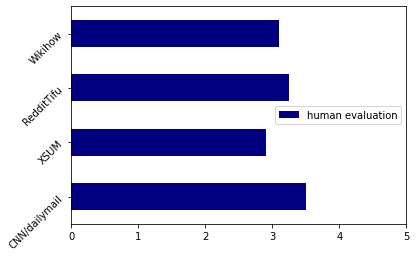

In [21]:
  #the human score is given by the each person of teh group manually
from matplotlib import cm
evaluation_by_human = pd.DataFrame({'CNN/dailymail': 3.5,
                                    'XSUM':2.9,
                                    'RedditTifu': Nakul_reddittifu.Human_evaluation.mean(),
                                    'Wikihow':bhagya_wikihow.human_evaluation.mean()},index=['human evaluation'])
evaluation_by_human.T.plot(kind='barh',xlim=(0,5),cmap = cm.get_cmap('jet'),rot=45)

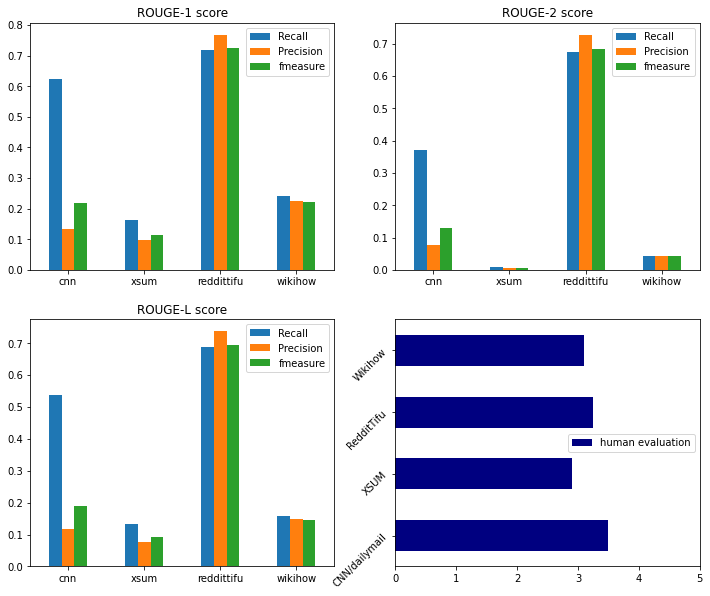

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(ncols=2,nrows=2)
df_r1.T.plot.bar(rot=0,figsize=(12,10),title = 'ROUGE-1 score',ax =ax[0,0])
df_r2.T.plot.bar(rot=0,title = 'ROUGE-2 score',ax =ax[0,1])
df_rL.T.plot.bar(rot=0,title = 'ROUGE-L score',ax =ax[1,0])
evaluation_by_human.T.plot(kind='barh',xlim=(0,5),cmap = cm.get_cmap('jet'),ax=ax[1,1],rot=45)


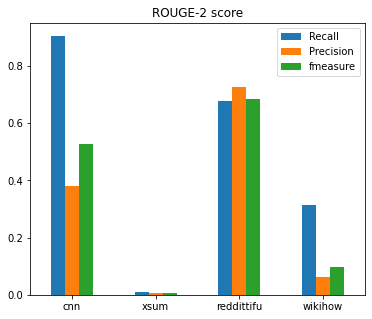

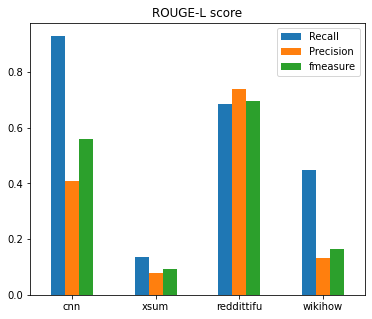

Arth Patel CNN_dailymail model evaluation 


In [24]:
arth = pd.DataFrame({'Recall':[np.array(r1_arth[0]).mean(),np.array(r2_arth[0]).mean(),np.array(rL_arth[0]).mean()],
                    'Precision':[np.array(r1_arth[1]).mean(),np.array(r2_arth[1]).mean(),np.array(rL_arth[1]).mean()],
                    'Fmeasure':[np.array(r1_arth[2]).mean(),np.array(r2_arth[2]).mean(),np.array(rL_arth[2]).mean()]},
                    index=['Rouge1','Rouge2','RougeL'])

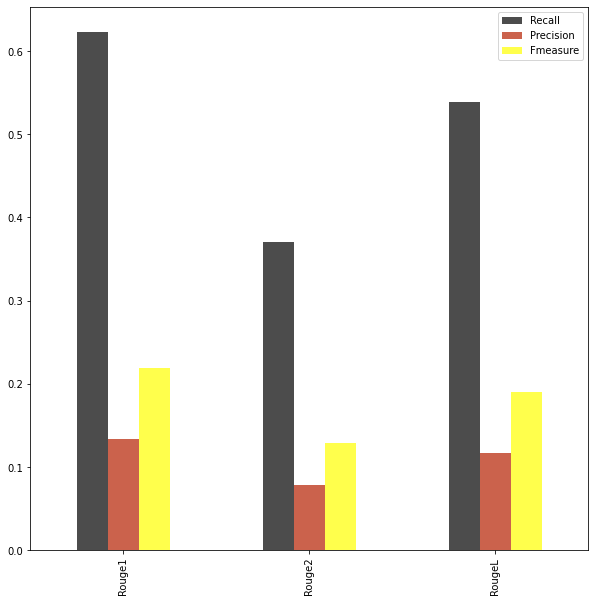

In [25]:
from matplotlib import cm
arth.plot.bar(alpha=0.7,figsize=(10,10),cmap = cm.get_cmap('gnuplot'))